# Comparing different hyperparameters

In [1]:
import json
from quewing import que
from typing import cast
import numpy as np
import matplotlib.pyplot as plt


In [2]:
exp_que = que()
exp_que.disp_runs('old_runs')


=== Old Runs ===

  [Idx] Run ID    Model     Split   Exp  Best Val Acc  Best Val Loss  Config
--------------------------------------------------------------------------------------------------------------------------------------------
  [  0] None      S3D       asl100  045  65.9763       1.5233         ./configfiles/generic/mode2b.ini
  [  1] None      S3D       asl100  044  66.8639       1.4983         ./configfiles/generic/mode2a.ini
  [  2] None      S3D       asl100  043  68.0473       1.4689         ./configfiles/generic/mode2.ini
  [  3] None      S3D       asl100  042  65.3846       1.7266         ./configfiles/generic/mode1.ini
  [  4] None      S3D       asl100  041  64.4970       1.6369         ./configfiles/generic/mode.ini
  [  5] dm8do4z5  S3D       asl100  040  70.1183       1.8099         ./configfiles/generic/hf_hwd_eps_hbs2.ini
  [  6] None      S3D       asl100  039  65.0888       2.2202         /home/luke/Code/SLR/code/configfiles/generic/hframe_hwd_leps4_t200.ini

### lets rank them

In [3]:
s3d_only = [run for run in exp_que.old_runs if run['admin']['model'] == 'S3D'][::-1]
reses = [(run['admin']['exp_no'],  run['results']) for run in s3d_only]

exps = []
losses = []
accs = []

for exp, res in reses:
    exps.append(exp)
    losses.append(res['test']['average_loss'])
    accs.append(res['test']['top_k_average_per_class_acc']['top1'])
    
assert len(exps) == len(losses) == len(accs)




### Average Loss

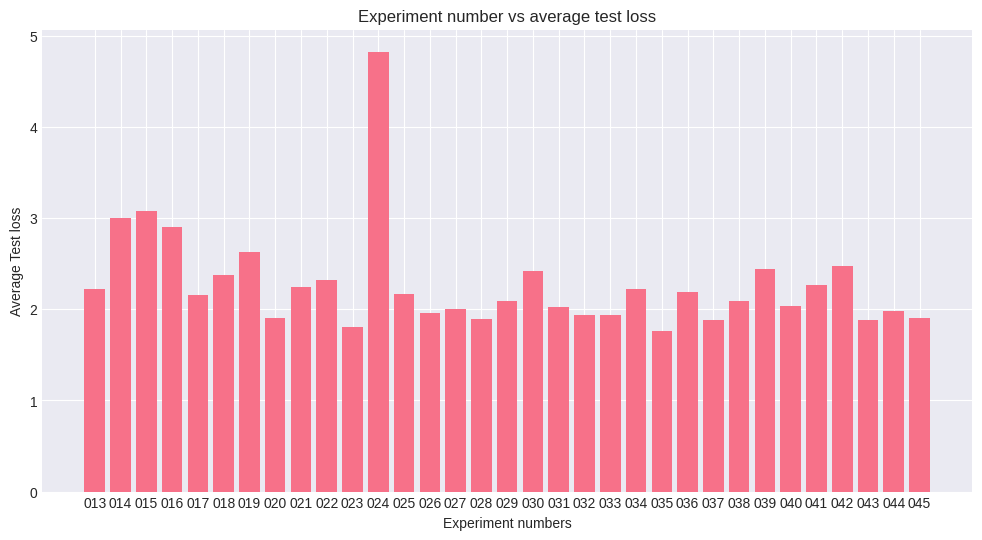

In [4]:
plt.figure(figsize=(12, 6))
plt.bar(exps, losses)
plt.title('Experiment number vs average test loss')
plt.xlabel('Experiment numbers')
plt.ylabel('Average Test loss')
plt.show()

In [5]:
best_loss = min(losses)
i = 0
l = float('inf')
for i, l in enumerate(losses):
    if l == best_loss:
        break
print("Best loss:")
print(f"Exp: {exps[i]}")
print(f"Loss: {l}")
print(f"Acc: {accs[i]}")

Best loss:
Exp: 035
Loss: 1.7634997771277428
Acc: 0.6401666666666667


### Top1 accuracy

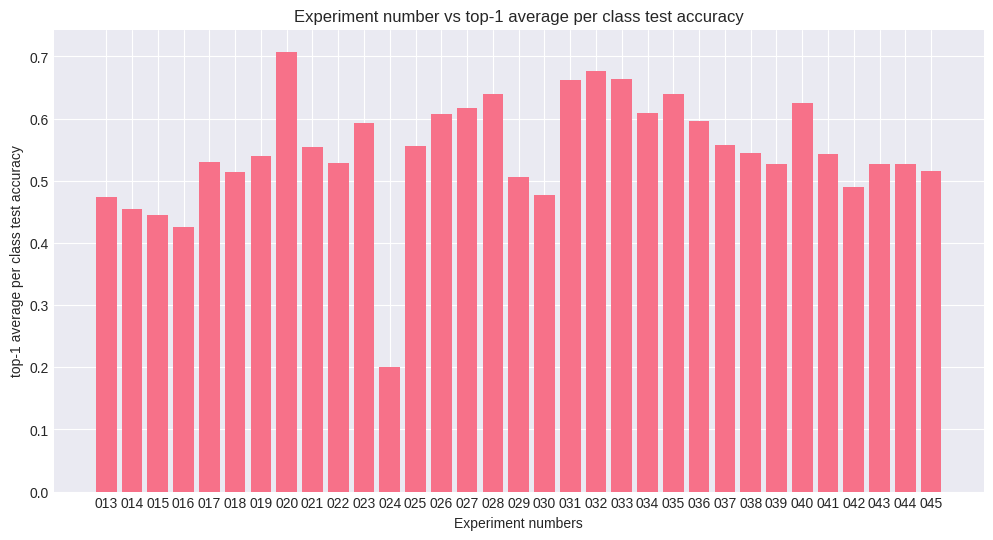

In [6]:
plt.figure(figsize=(12, 6))
plt.bar(exps, accs)
plt.title('Experiment number vs top-1 average per class test accuracy')
plt.xlabel('Experiment numbers')
plt.ylabel('top-1 average per class test accuracy')
plt.show()

In [7]:
best_acc = max(accs)
i = 0
a = 0
for i, a in enumerate(accs):
    if a == best_acc:
        break
print("Best accuracy:")
print(f"Exp: {exps[i]}")
print(f"Loss: {losses[i]}")
print(f"Accuracy: {a}")

Best accuracy:
Exp: 020
Loss: 1.9074238078486851
Accuracy: 0.7076666666666667


## Out of interest, lets see if these are the same for the val set

In [8]:
exps = []
losses = []
accs = []

for exp, res in reses:
    exps.append(exp)
    losses.append(res['val']['average_loss'])
    accs.append(res['val']['top_k_average_per_class_acc']['top1'])

## Best loss

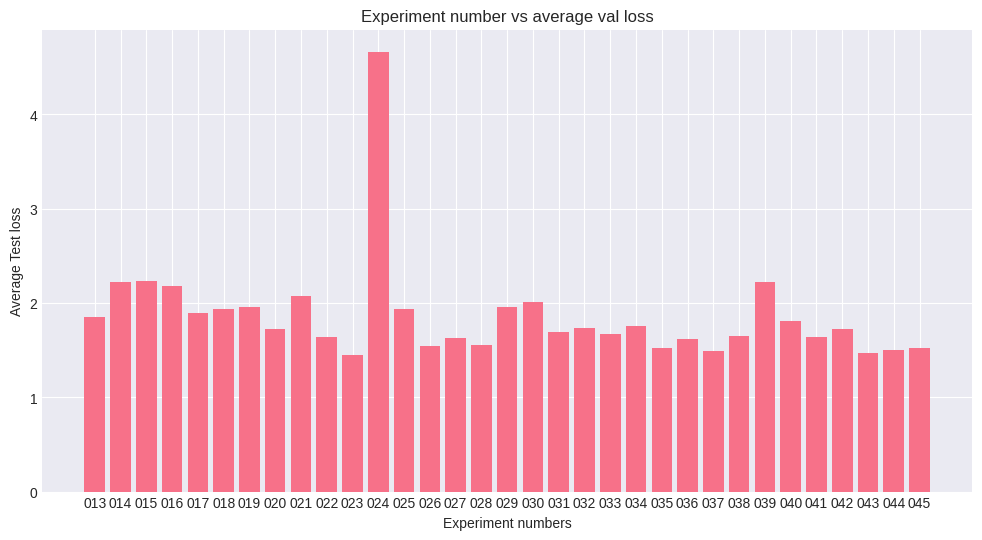

Best loss:
Exp: 023
Loss: 1.447925063179952
Acc: 0.6618333333333334


In [9]:
plt.figure(figsize=(12, 6))
plt.bar(exps, losses)
plt.title('Experiment number vs average val loss')
plt.xlabel('Experiment numbers')
plt.ylabel('Average Test loss')
plt.show()

best_loss = min(losses)
i = 0
l = float('inf')
for i, l in enumerate(losses):
    if l == best_loss:
        break
print("Best loss:")
print(f"Exp: {exps[i]}")
print(f"Loss: {l}")
print(f"Acc: {accs[i]}")

## Best acc

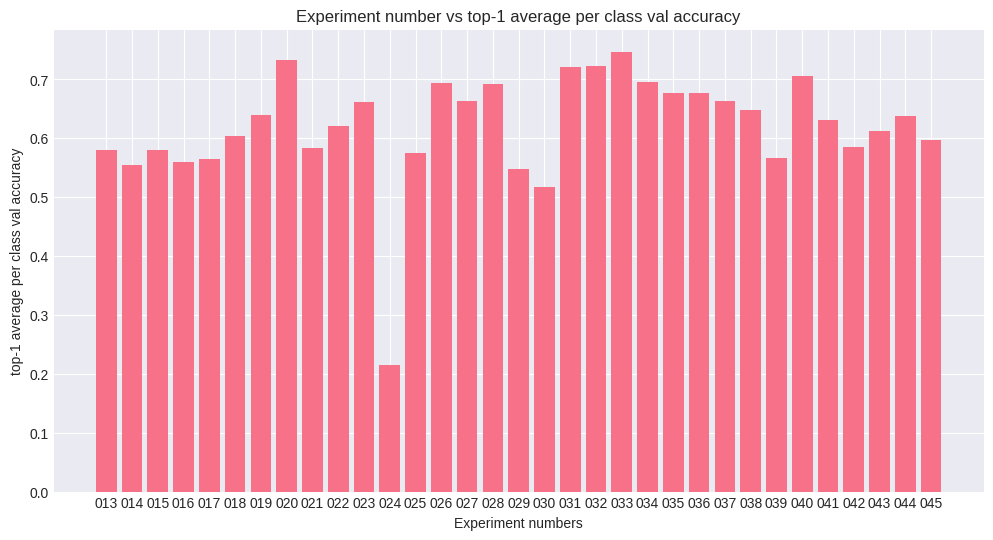

Best accuracy:
Exp: 033
Loss: 1.6676101968609074
Accuracy: 0.7471666666666669


In [10]:
plt.figure(figsize=(12, 6))
plt.bar(exps, accs)
plt.title('Experiment number vs top-1 average per class val accuracy')
plt.xlabel('Experiment numbers')
plt.ylabel('top-1 average per class val accuracy')
plt.show()

best_acc = max(accs)
i = 0
a = 0
for i, a in enumerate(accs):
    if a == best_acc:
        break
print("Best accuracy:")
print(f"Exp: {exps[i]}")
print(f"Loss: {losses[i]}")
print(f"Accuracy: {a}")

### Rather difficult to choose the best model

The best val loss doesn't correlate to the best test loss, and the best val or test loss, does not correlat with the best val or test accuracy. But perhaps we can look at the averages? 

In [11]:
exps = []
losses = []
accs = []

for exp, res in reses:
    exps.append(exp)
    losses.append((res['val']['average_loss'] + res['test']['average_loss']) / 2)
    accs.append((res['val']['top_k_average_per_class_acc']['top1'] + res['test']['top_k_average_per_class_acc']['top1']) / 2)

### loss

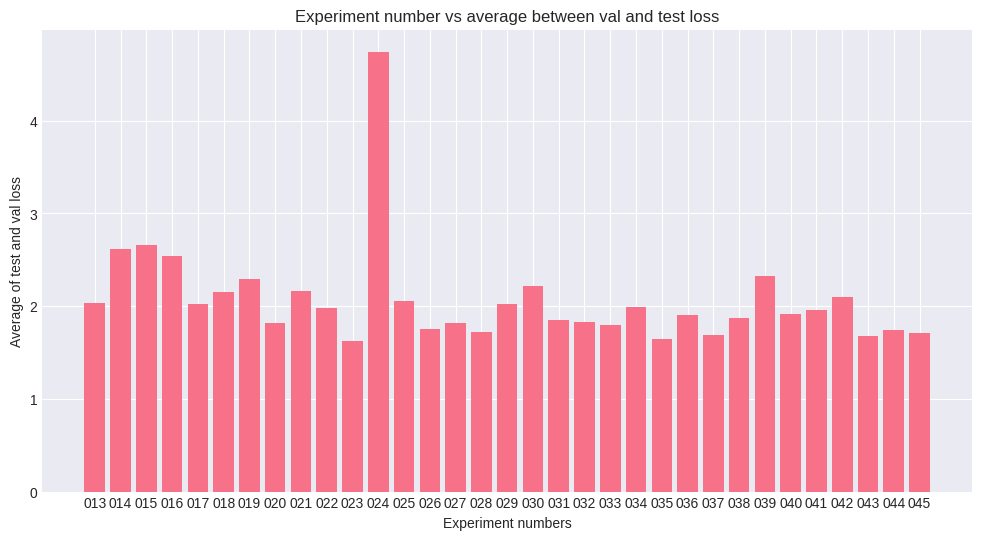

Best loss:
Exp: 023
Loss: 1.6249457031779182
Acc: 0.6270833333333334


In [12]:
plt.figure(figsize=(12, 6))
plt.bar(exps, losses)
plt.title('Experiment number vs average between val and test loss')
plt.xlabel('Experiment numbers')
plt.ylabel('Average of test and val loss')
plt.show()

best_loss = min(losses)
i = 0
l = float('inf')
for i, l in enumerate(losses):
    if l == best_loss:
        break
print("Best loss:")
print(f"Exp: {exps[i]}")
print(f"Loss: {l}")
print(f"Acc: {accs[i]}")

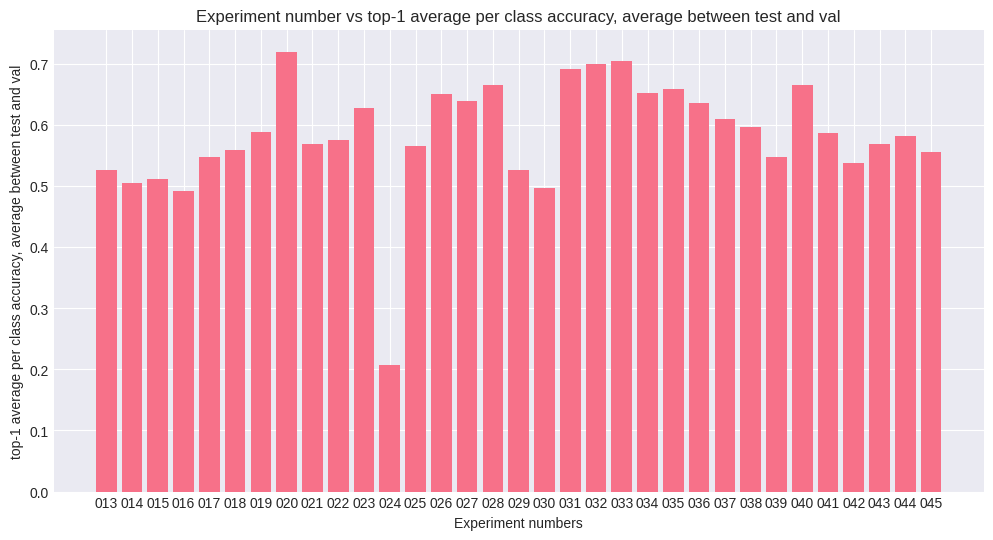

Best accuracy:
Exp: 020
Loss: 1.8160296478634743
Accuracy: 0.7201666666666666


In [13]:
plt.figure(figsize=(12, 6))
plt.bar(exps, accs)
plt.title('Experiment number vs top-1 average per class accuracy, average between test and val')
plt.xlabel('Experiment numbers')
plt.ylabel('top-1 average per class accuracy, average between test and val')
plt.show()

best_acc = max(accs)
i = 0
a = 0
for i, a in enumerate(accs):
    if a == best_acc:
        break
print("Best accuracy:")
print(f"Exp: {exps[i]}")
print(f"Loss: {losses[i]}")
print(f"Accuracy: {a}")

## Lets sort them

In [14]:
x = np.arange(5)
print(x)
y = np.random.random(5)
print(y)

stacked = [(i, j) for i, j in zip(x, y)]

print(stacked)

s = sorted(stacked, key=lambda x: x[1])
print(s)



[0 1 2 3 4]
[0.5661215  0.25186179 0.19148845 0.04474587 0.13991579]
[(np.int64(0), np.float64(0.5661215021860405)), (np.int64(1), np.float64(0.2518617922509676)), (np.int64(2), np.float64(0.19148844517006347)), (np.int64(3), np.float64(0.04474587316984524)), (np.int64(4), np.float64(0.13991578887605738))]
[(np.int64(3), np.float64(0.04474587316984524)), (np.int64(4), np.float64(0.13991578887605738)), (np.int64(2), np.float64(0.19148844517006347)), (np.int64(1), np.float64(0.2518617922509676)), (np.int64(0), np.float64(0.5661215021860405))]


In [15]:
stacked_loss = [(i, j) for i, j in zip(exps, losses)]
stacked_acc = [(i,j) for i,j in zip(exps, accs)]

sorted_loss = sorted(stacked_loss, key=lambda x: x[1], reverse=True)
sorted_acc = sorted(stacked_acc, key=lambda x: x[1])



In [16]:
def do_loss(exps, losses):
    plt.figure(figsize=(12, 6))
    plt.bar(exps, losses)
    plt.title('Experiment number vs average between val and test loss')
    plt.xlabel('Experiment numbers')
    plt.ylabel('Average of test and val loss')
    plt.show()

    best_loss = min(losses)
    i = 0
    l = float('inf')
    for i, l in enumerate(losses):
        if l == best_loss:
            break
    print("Best loss:")
    print(f"Exp: {exps[i]}")
    print(f"Loss: {l}")
    print(f"Acc: {accs[i]}")
    
    
def do_acc(exps, accs):
    plt.figure(figsize=(12, 6))
    plt.bar(exps, accs)
    plt.title('Experiment number vs top-1 average per class accuracy, average between test and val')
    plt.xlabel('Experiment numbers')
    plt.ylabel('top-1 average per class accuracy, average between test and val')
    plt.show()

    best_acc = max(accs)
    i = 0
    a = 0
    for i, a in enumerate(accs):
        if a == best_acc:
            break
    print("Best accuracy:")
    print(f"Exp: {exps[i]}")
    print(f"Loss: {losses[i]}")
    print(f"Accuracy: {a}")

In [17]:
los_exps = [exp for exp, _ in sorted_loss]
los = [ls for _, ls in sorted_loss]

ac_exps = [exp for exp, _ in sorted_acc]
ac = [ac for _, ac in sorted_acc]


### loss

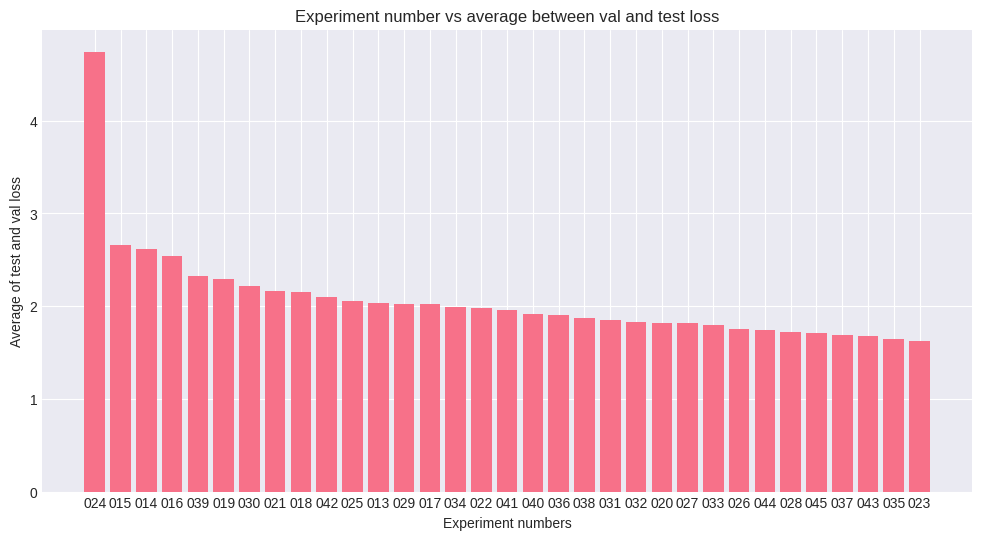

Best loss:
Exp: 023
Loss: 1.6249457031779182
Acc: 0.5562499999999999


In [18]:
do_loss(los_exps, los)

### Acc

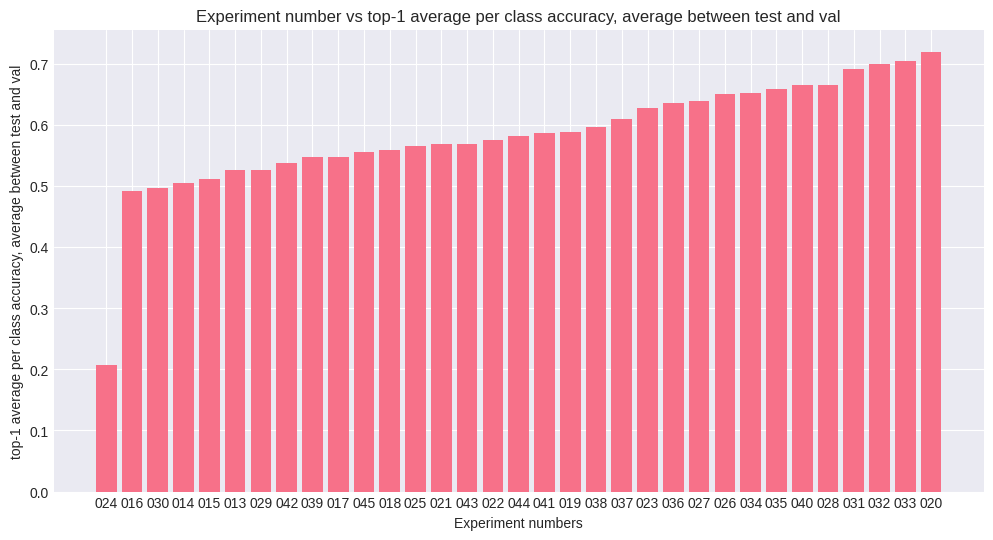

Best accuracy:
Exp: 020
Loss: 1.7116635601301415
Accuracy: 0.7201666666666666


In [19]:
do_acc(ac_exps, ac)

In [ ]:
idxs, found = exp_que._find_runs(s3d_only, ['admin', 'recover'], lambda x: x)
print(len(found))
print(idxs)

3
[23, 24, 27]
